<a href="https://colab.research.google.com/github/himasri-24/Diabetic-Vision-Impairment/blob/main/comparison_and_accuracy_loss_and_confusion_matrix_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow matplotlib seaborn scikit-learn

✅ Files successfully extracted to: /content/extracted_images
Found 2200 images belonging to 5 classes.
Found 550 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 78s 550ms/step - accuracy: 0.4649 - loss: 1.3908 - val_accuracy: 0.6364 - val_loss: 1.0053
Epoch 2/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 77s 556ms/step - accuracy: 0.6057 - loss: 1.0462 - val_accuracy: 0.6745 - val_loss: 0.9247
Epoch 3/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 77s 558ms/step - accuracy: 0.6277 - loss: 0.9864 - val_accuracy: 0.6782 - val_loss: 0.9070
Epoch 4/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 82s 559ms/step - accuracy: 0.6632 - loss: 0.9209 - val_accuracy: 0.6455 - val_loss: 0.9249
Epoch 5/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 77s 560ms/step - accuracy: 0.6789 - loss: 0.8971 - val_accuracy: 0.6800 - val_loss: 0.8507


✅ Custom CNN model saved as 'diabetic_retinopathy_cnn.h5'
Epoch 1/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 570s 4s/step - accuracy: 0.4946 - loss: 1.4851 - val_accuracy: 0.6255 - val_loss: 1.0134
Epoch 2/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 622s 4s/step - accuracy: 0.5907 - loss: 1.0990 - val_accuracy: 0.6345 - val_loss: 0.9405
Epoch 3/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 586s 4s/step - accuracy: 0.6097 - loss: 1.0604 - val_accuracy: 0.6236 - val_loss: 0.9756
Epoch 4/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 597s 4s/step - accuracy: 0.6216 - loss: 1.0272 - val_accuracy: 0.6473 - val_loss: 0.9227
Epoch 5/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 586s 4s/step - accuracy: 0.6245 - loss: 1.0092 - val_accuracy: 0.6255 - val_loss: 0.9157


✅ VGG16 model saved as 'diabetic_retinopathy_vgg16.h5'


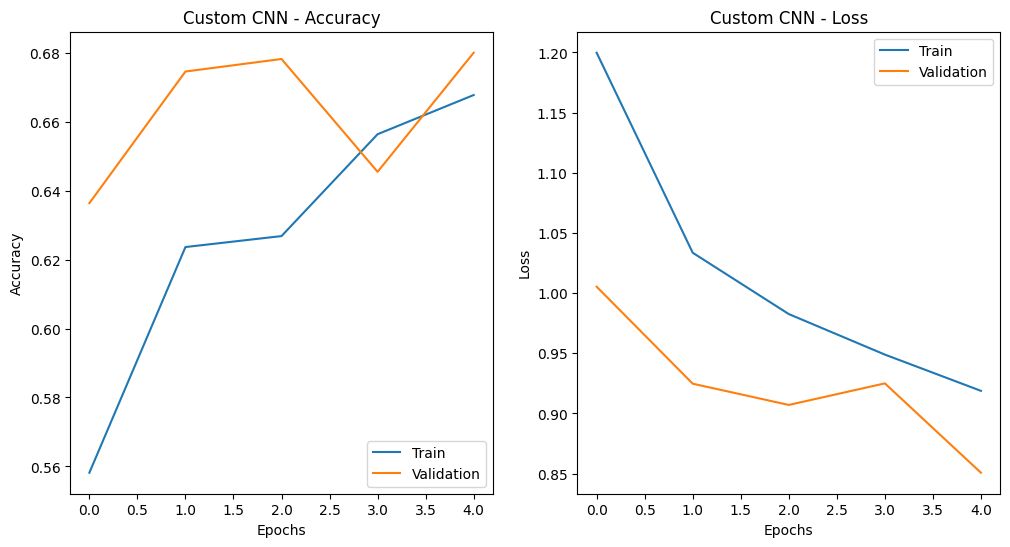

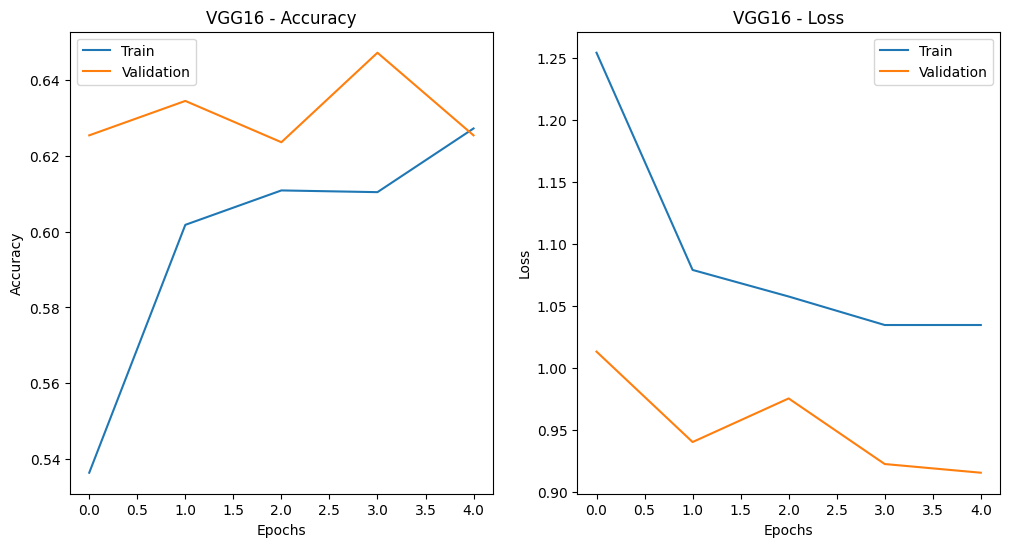

35/35 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step


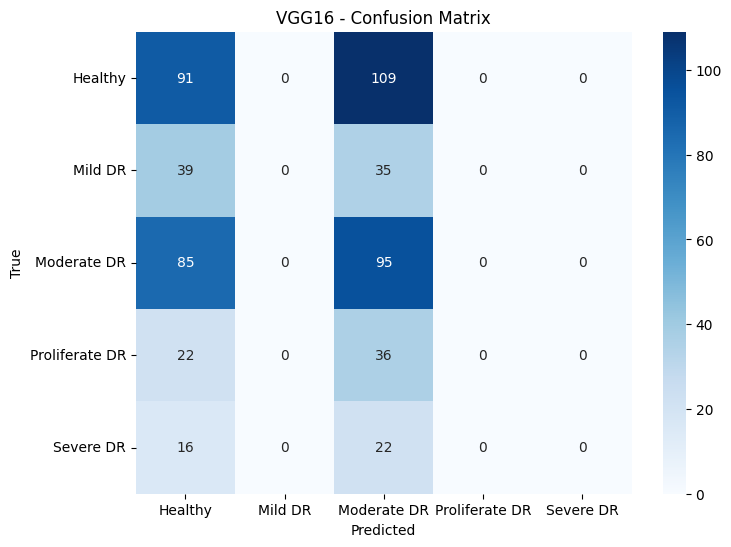

35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step


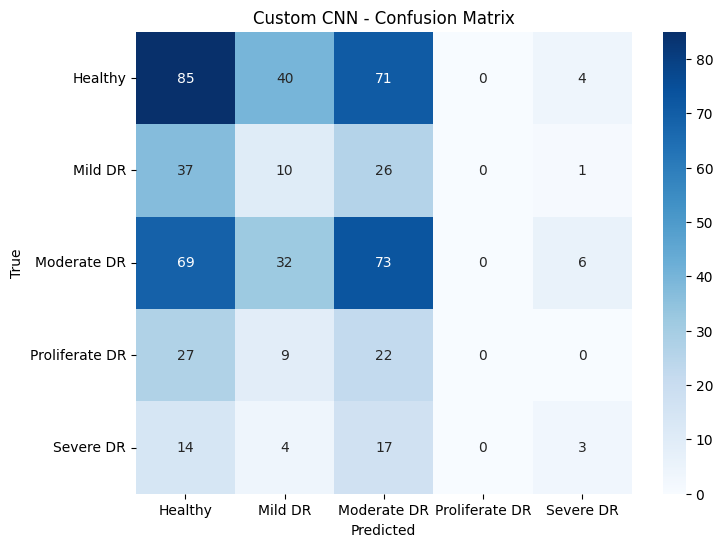

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define constants
IMG_SIZE = (128, 128)
BATCH_SIZE = 16
EPOCHS = 5
ZIP_FILE_PATH = "/content/archive.zip"
EXTRACTED_FOLDER = "/content/extracted_images"

# --- Step 1: Validate and Extract ZIP File ---
if not os.path.exists(ZIP_FILE_PATH):
    raise FileNotFoundError(f"ERROR: ZIP file '{ZIP_FILE_PATH}' not found. Please upload the correct file.")

try:
    with zipfile.ZipFile(ZIP_FILE_PATH, 'r') as zip_ref:
        zip_ref.extractall(EXTRACTED_FOLDER)
    print(f"✅ Files successfully extracted to: {EXTRACTED_FOLDER}")
except zipfile.BadZipFile:
    raise zipfile.BadZipFile("ERROR: The file is not a valid ZIP archive. Please check and re-upload.")

# --- Step 2: Set Up Data Generators ---
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    EXTRACTED_FOLDER, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training'
)
val_generator = datagen.flow_from_directory(
    EXTRACTED_FOLDER, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation'
)

# --- Step 3: Build & Train Custom CNN Model ---
model_cnn = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping_cnn = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_cnn = model_cnn.fit(
    train_generator, validation_data=val_generator, epochs=EPOCHS, steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator), callbacks=[early_stopping_cnn]
)

model_cnn.save('diabetic_retinopathy_cnn.h5')
print("✅ Custom CNN model saved as 'diabetic_retinopathy_cnn.h5'")

# --- Step 4: Build & Train VGG16 Model ---
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False

model_vgg16 = keras.Sequential([
    base_model, layers.Flatten(), layers.Dense(128, activation='relu'), layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping_vgg16 = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_vgg16 = model_vgg16.fit(
    train_generator, validation_data=val_generator, epochs=EPOCHS, steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator), callbacks=[early_stopping_vgg16]
)

model_vgg16.save('diabetic_retinopathy_vgg16.h5')
print("✅ VGG16 model saved as 'diabetic_retinopathy_vgg16.h5'")

# --- Step 5: Plot Accuracy and Loss Graphs ---
def plot_accuracy_loss(history, model_name):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_accuracy_loss(history_cnn, "Custom CNN")
plot_accuracy_loss(history_vgg16, "VGG16")

# --- Step 6: Generate Confusion Matrices ---
val_labels = val_generator.classes

predictions_vgg16 = model_vgg16.predict(val_generator, steps=len(val_generator), verbose=1)
predicted_classes_vgg16 = np.argmax(predictions_vgg16, axis=1)
cm_vgg16 = confusion_matrix(val_labels, predicted_classes_vgg16)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_vgg16, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.title('VGG16 - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

predictions_cnn = model_cnn.predict(val_generator, steps=len(val_generator), verbose=1)
predicted_classes_cnn = np.argmax(predictions_cnn, axis=1)
cm_cnn = confusion_matrix(val_labels, predicted_classes_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.title('Custom CNN - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
